In [13]:
import os
import math
import dill
from itertools import permutations

import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from matplotlib import gridspec
from sklearn.linear_model import HuberRegressor as hubreg
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from pingouin import mixed_anova, anova, pairwise_tukey


import suite2p as s2p

import TwoPUtils as tpu
import STX3KO_analyses as stx
from STX3KO_analyses import utilities as u
from STX3KO_analyses.single_cell_stats import CellStats 

ko_mice = stx.ymaze_sess_deets.ko_mice
ctrl_mice = stx.ymaze_sess_deets.ctrl_mice


%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
figdir = "/mnt/BigDisk/YMazeResults/neural"

In [15]:
fam_cell_stats = CellStats(fam=True)

{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 6, 'scan': 14, 'novel': -1, 'ravel_ind': 1}
{'date': '29_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': -1, 'ravel_ind': 2}
{'date': '30_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': -1, 'ravel_ind': 3}
{'date': '01_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel': -1, 'ravel_ind': 4}
{'date': '02_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': -1, 'ravel_ind': 5}
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': -1, 'ravel_ind': 6}
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 3, 'scan': 8, 'novel': 1, 'ravel_ind': 0}
{'date': '29_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': 1, 'ravel_ind': 1}
{'date': '30_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': 1, 'ravel_ind': 2}
{'date': '01_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': 1,

/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /media/mplitt/Backup Plus3/2P_Data/4467333.1/05_12_2020/YMaze_LNovel/YMaze_LNovel_001_002.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /media/mplitt/Backup Plus3/2P_Data/4467333.1/05_12_2020/YMaze_LNovel/YMaze_LNovel_001_002.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


(<Figure size 1296x360 with 1 Axes>, <AxesSubplot:>)

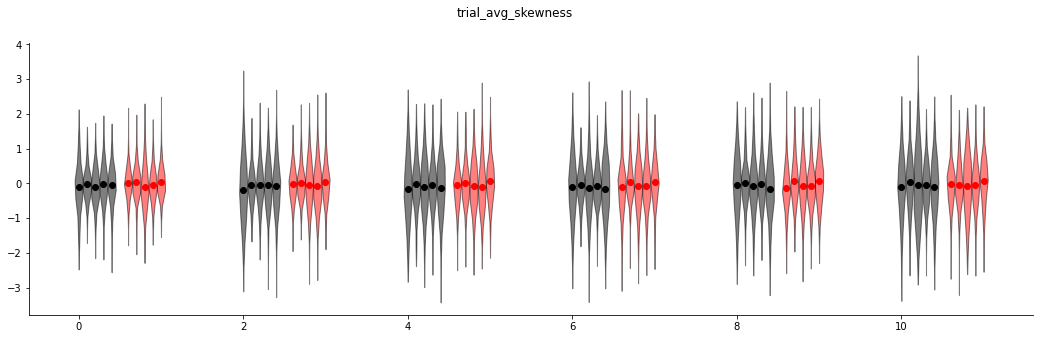

In [16]:
fam_cell_stats.violin_plots('trial_avg_skewness')

(<Figure size 2160x360 with 6 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>], dtype=object))

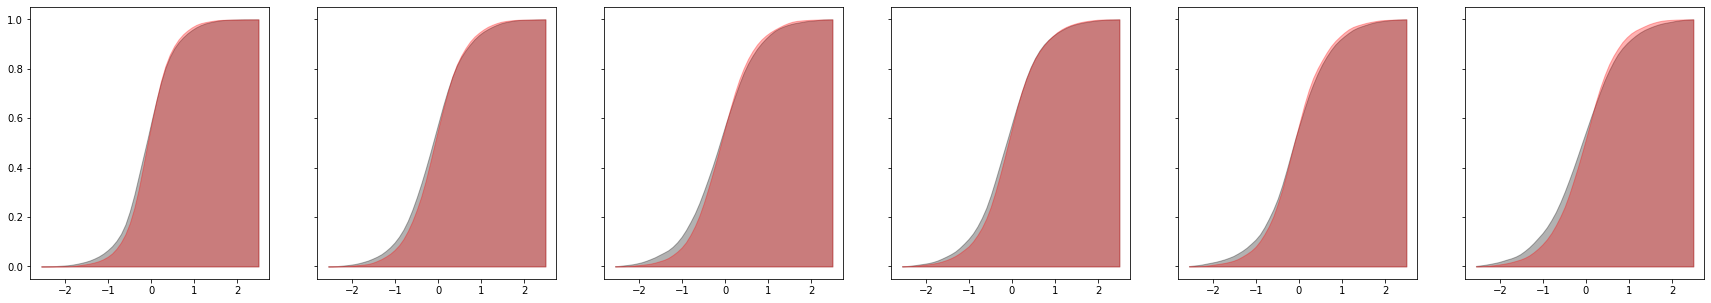

In [19]:
fam_cell_stats.combined_hist('trial_avg_skewness', cumulative=True, smooth=True)

In [18]:
fam_cell_stats.mixed_anova('trial_avg_skewness')

Mixed design ANOVA results
        Source        SS  DF1  DF2        MS         F     p-unc       np2  \
0      ko_ctrl  0.032909    1    8  0.032909  1.882597  0.207278  0.190496   
1          day  0.007693    5   40  0.001539  1.293544  0.285950  0.139187   
2  Interaction  0.003684    5   40  0.000737  0.619431  0.685697  0.071865   

        eps  
0       NaN  
1  0.500318  
2       NaN  
PostHoc Tukey: KO vs Ctrl
   A  B   mean(A)   mean(B)      diff        se         T   p-tukey    hedges
0  0  1 -0.024992 -0.071832  0.046839  0.015116  3.098601  0.002996  0.789665
PostHov Tukey on each day
Day 0
   A  B   mean(A)   mean(B)      diff        se         T   p-tukey    hedges
0  0  1 -0.015947 -0.057809  0.041862  0.036607  1.143546  0.285873  0.653251
Day 1
   A  B   mean(A)  mean(B)      diff        se       T   p-tukey    hedges
0  0  1 -0.017587 -0.08493  0.067343  0.035302  1.9076  0.092873  1.089717
Day 2
   A  B   mean(A)   mean(B)      diff        se         T   p-tukey    h

{'anova':         Source        SS  DF1  DF2        MS         F     p-unc       np2  \
 0      ko_ctrl  0.032909    1    8  0.032909  1.882597  0.207278  0.190496   
 1          day  0.007693    5   40  0.001539  1.293544  0.285950  0.139187   
 2  Interaction  0.003684    5   40  0.000737  0.619431  0.685697  0.071865   
 
         eps  
 0       NaN  
 1  0.500318  
 2       NaN  ,
 'ko_ctrl_tukey':    A  B   mean(A)   mean(B)      diff        se         T   p-tukey    hedges
 0  0  1 -0.024992 -0.071832  0.046839  0.015116  3.098601  0.002996  0.789665,
 'day_tukey': [   A  B   mean(A)   mean(B)      diff        se         T   p-tukey    hedges
  0  0  1 -0.015947 -0.057809  0.041862  0.036607  1.143546  0.285873  0.653251,
     A  B   mean(A)  mean(B)      diff        se       T   p-tukey    hedges
  0  0  1 -0.017587 -0.08493  0.067343  0.035302  1.9076  0.092873  1.089717,
     A  B   mean(A)   mean(B)      diff        se         T   p-tukey    hedges
  0  0  1 -0.032165 -0.0882

/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/single_cell_stats.py:299: RuntimeWarning: Mean of empty slice
  ko_mu, ko_sem = np.nanmean(ko_mu_arr, axis=0), sp.stats.sem(ko_mu_arr, axis=0, nan_policy='omit')
/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/single_cell_stats.py:300: RuntimeWarning: Mean of empty slice
  ctrl_mu, ctrl_sem = np.nanmean(ctrl_mu_arr, axis=0), sp.stats.sem(ctrl_mu_arr, axis=0, nan_policy='omit')


(<Figure size 2160x720 with 12 Axes>,
 array([[<AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>],
        [<AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>]], dtype=object))

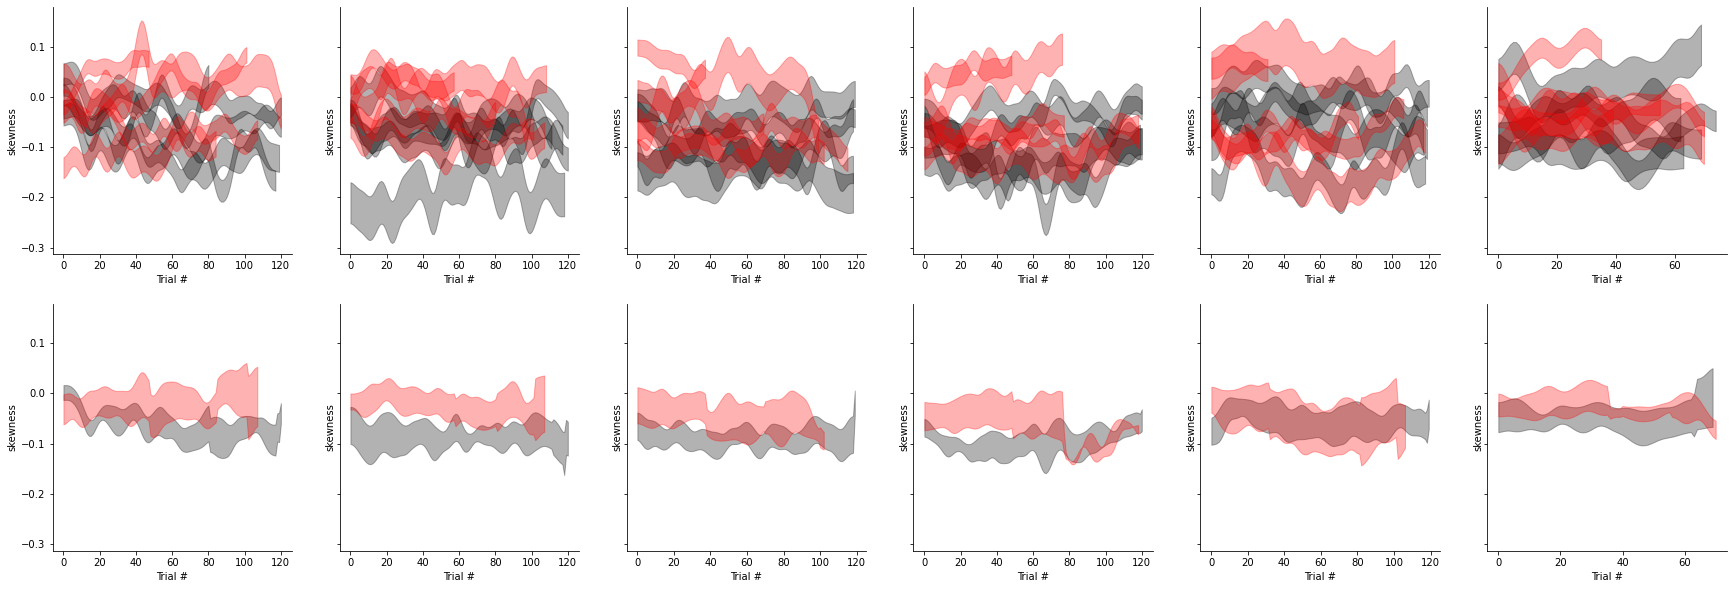

In [7]:
fam_cell_stats.across_trial_plot('skewness')

In [20]:
nov_cell_stats = CellStats(fam=False)

{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 6, 'scan': 14, 'novel': -1, 'ravel_ind': 1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:95: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /media/mplitt/Backup Plus2/2P_Data/4467975.1/28_09_2020/YMaze_LNovel/YMaze_LNovel_006_014.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /media/mplitt/Backup Plus2/2P_Data/4467975.1/28_09_2020/YMaze_LNovel/YMaze_LNovel_006_014.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


{'date': '29_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': -1, 'ravel_ind': 2}
{'date': '30_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': -1, 'ravel_ind': 3}
{'date': '01_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel': -1, 'ravel_ind': 4}
{'date': '02_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': -1, 'ravel_ind': 5}
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': -1, 'ravel_ind': 6}
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 3, 'scan': 8, 'novel': 1, 'ravel_ind': 0}
{'date': '29_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': 1, 'ravel_ind': 1}
{'date': '30_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': 1, 'ravel_ind': 2}
{'date': '01_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': 1, 'ravel_ind': 3}
{'date': '02_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 9, 'novel': 1, '

/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /media/mplitt/Backup Plus3/2P_Data/4467333.1/05_12_2020/YMaze_LNovel/YMaze_LNovel_001_002.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /media/mplitt/Backup Plus3/2P_Data/4467333.1/05_12_2020/YMaze_LNovel/YMaze_LNovel_001_002.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


Mixed design ANOVA results
        Source        SS  DF1  DF2        MS         F     p-unc       np2  \
0      ko_ctrl  0.187504    1    8  0.187504  4.374825  0.069843  0.353526   
1          day  0.005024    5   40  0.001005  0.265880  0.929065  0.032166   
2  Interaction  0.004156    5   40  0.000831  0.219909  0.951893  0.026753   

        eps  
0       NaN  
1  0.668933  
2       NaN  
PostHoc Tukey: KO vs Ctrl
   A  B   mean(A)   mean(B)      diff       se         T  p-tukey    hedges
0  0  1  0.022946 -0.088859  0.111805  0.02405  4.648748    0.001  1.184713
PostHov Tukey on each day
Day 0
   A  B   mean(A)   mean(B)      diff        se         T  p-tukey    hedges
0  0  1  0.040028 -0.077795  0.117823  0.050414  2.337095  0.04763  1.335066
Day 1
   A  B   mean(A)   mean(B)      diff        se         T   p-tukey    hedges
0  0  1  0.020986 -0.088515  0.109501  0.066471  1.647364  0.138098  0.941057
Day 2
   A  B   mean(A)  mean(B)     diff        se         T   p-tukey    hed

{'anova':         Source        SS  DF1  DF2        MS         F     p-unc       np2  \
 0      ko_ctrl  0.187504    1    8  0.187504  4.374825  0.069843  0.353526   
 1          day  0.005024    5   40  0.001005  0.265880  0.929065  0.032166   
 2  Interaction  0.004156    5   40  0.000831  0.219909  0.951893  0.026753   
 
         eps  
 0       NaN  
 1  0.668933  
 2       NaN  ,
 'ko_ctrl_tukey':    A  B   mean(A)   mean(B)      diff       se         T  p-tukey    hedges
 0  0  1  0.022946 -0.088859  0.111805  0.02405  4.648748    0.001  1.184713,
 'day_tukey': [   A  B   mean(A)   mean(B)      diff        se         T  p-tukey    hedges
  0  0  1  0.040028 -0.077795  0.117823  0.050414  2.337095  0.04763  1.335066,
     A  B   mean(A)   mean(B)      diff        se         T   p-tukey    hedges
  0  0  1  0.020986 -0.088515  0.109501  0.066471  1.647364  0.138098  0.941057,
     A  B   mean(A)  mean(B)     diff        se         T   p-tukey    hedges
  0  0  1  0.036631 -0.09879 

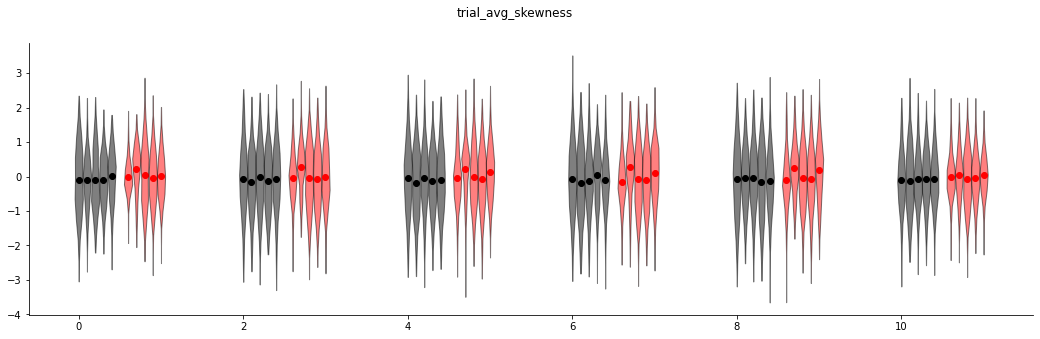

In [22]:
nov_cell_stats.violin_plots('trial_avg_skewness')
nov_cell_stats.mixed_anova('trial_avg_skewness')

(<Figure size 2160x360 with 6 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>], dtype=object))

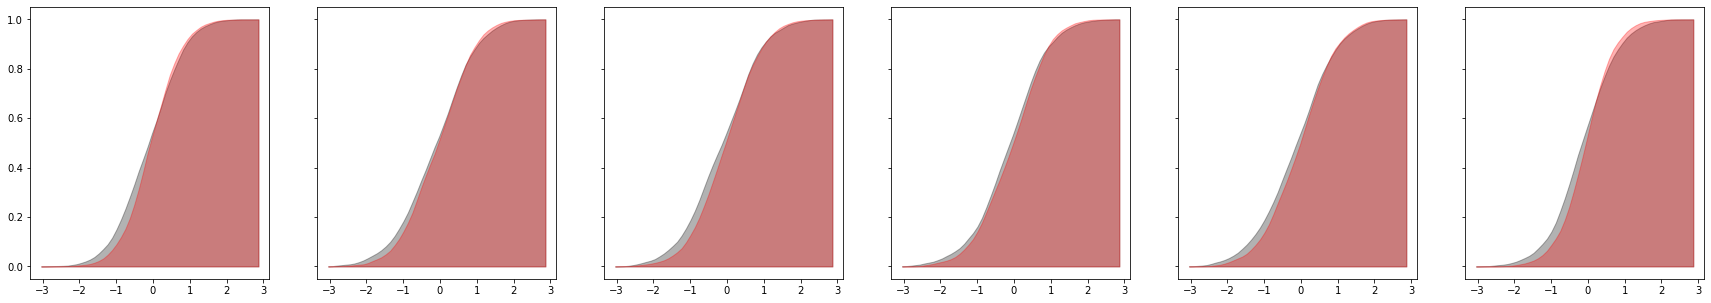

In [24]:
nov_cell_stats.combined_hist('trial_avg_skewness', cumulative=True, smooth=True)

/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/single_cell_stats.py:299: RuntimeWarning: Mean of empty slice
  ko_mu, ko_sem = np.nanmean(ko_mu_arr, axis=0), sp.stats.sem(ko_mu_arr, axis=0, nan_policy='omit')
/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/single_cell_stats.py:300: RuntimeWarning: Mean of empty slice
  ctrl_mu, ctrl_sem = np.nanmean(ctrl_mu_arr, axis=0), sp.stats.sem(ctrl_mu_arr, axis=0, nan_policy='omit')


(<Figure size 2160x720 with 12 Axes>,
 array([[<AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>],
        [<AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>]], dtype=object))

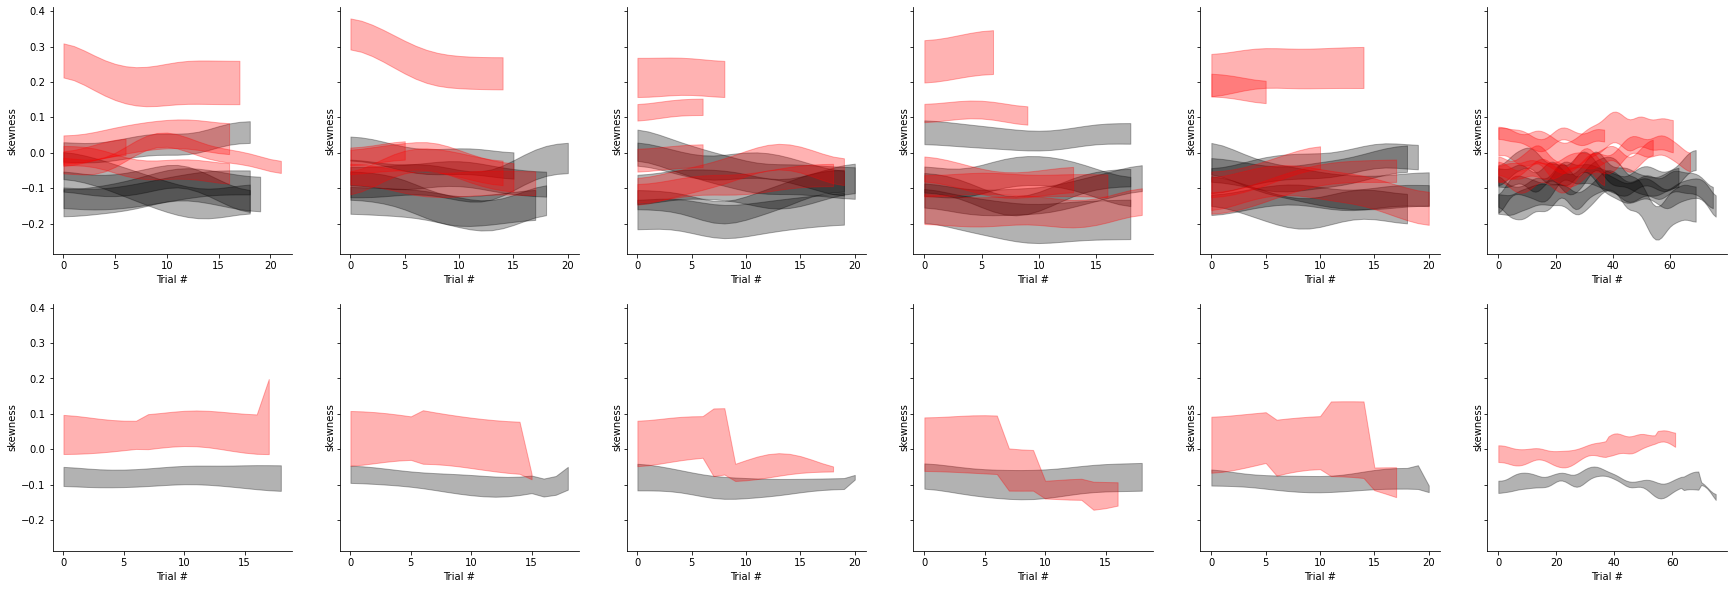

In [42]:
nov_cell_stats.across_trial_plot('skewness')